# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

here i import necessary libaries

In [127]:
pd.set_option('display.max_columns',None)

This command will display max columns, so we can view the data

In [3]:
customer=pd.read_csv("E:\\Data Science\\Data Trained Evaluation Project\\Telecom_customer_churn.csv")
customer.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
customer.shape

(7043, 21)

the dataset contains 7043 rows and 21 columns

In [5]:
customer=customer.drop(columns=['customerID'])

we drop the column 'customerID' as it is not necessary for data analysis

In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In this dataset we have 21 columns, out of 21 columns, 2 columns are integer type, 1 column is float datatype and 18 columns are object datatype

In [7]:
customer.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null value find in our dataset, so we proceed to next step

In [8]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Describe method give statistical description of numerical columns only, there are 3  numerical columns in our dataset ,first column 'SeniorCitizen',  has min value 0 and max value 1,so it is categorical feature. "tenure"  and 'MonthlyCharges'is continous data feature with its mean and standard deviation are given, along with this first,second and third quartile range is also given

# Univariate Analysis

In univariate analysis we deal with categorical values and continous values. we build count plot for each column, also get value counts and non unique values for each column

In [9]:
customer['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [10]:
customer['gender'].nunique()

2

<AxesSubplot:xlabel='gender', ylabel='count'>

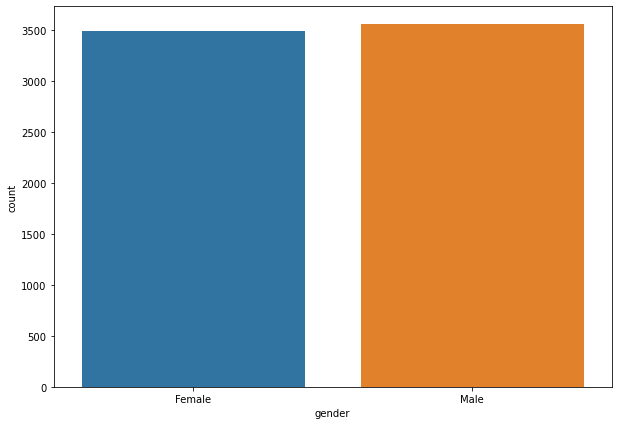

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(customer['gender'])

In [12]:
customer['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [13]:
customer['SeniorCitizen'].nunique()

2

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

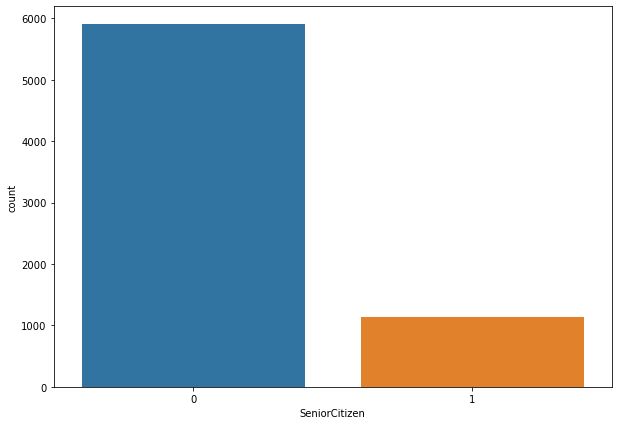

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(customer['SeniorCitizen'])

In [15]:
customer['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [16]:
customer['Partner'].nunique()

2

<AxesSubplot:xlabel='Partner', ylabel='count'>

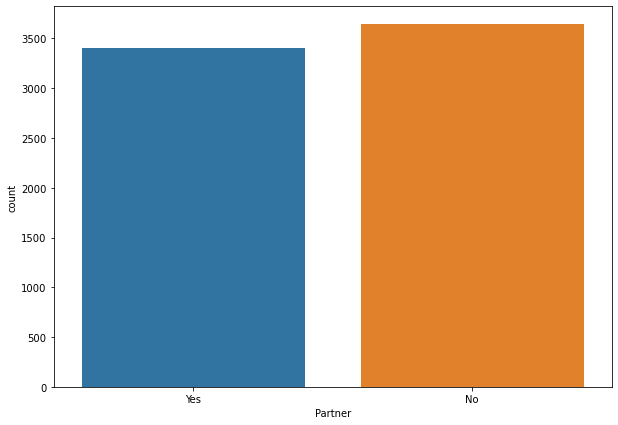

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(customer['Partner'])

In [18]:
customer['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [19]:
customer['Dependents'].nunique()

2

<AxesSubplot:xlabel='Dependents', ylabel='count'>

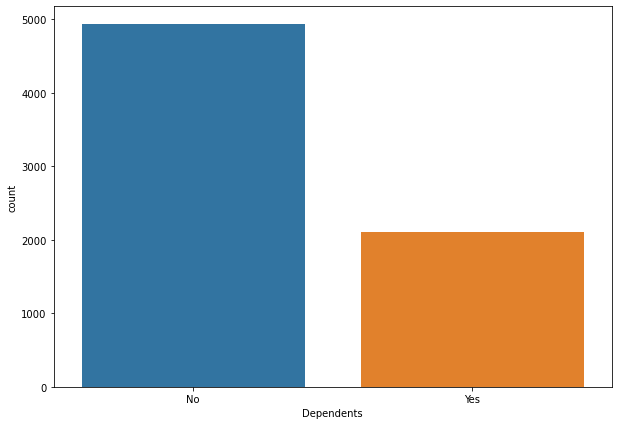

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(customer['Dependents'])

In [21]:
customer['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
52     80
25     79
26     79
14     76
65     76
61     76
60     76
46     74
19     73
63     72
29     72
27     72
30     72
20     71
62     70
41     70
53     70
32     69
54     68
47     68
50     68
51     68
58     67
49     66
43     65
42     65
31     65
34     65
37     65
57     65
55     64
40     64
48     64
33     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, dtype: int64

In [22]:
customer['tenure'].nunique()

73

<AxesSubplot:xlabel='tenure', ylabel='count'>

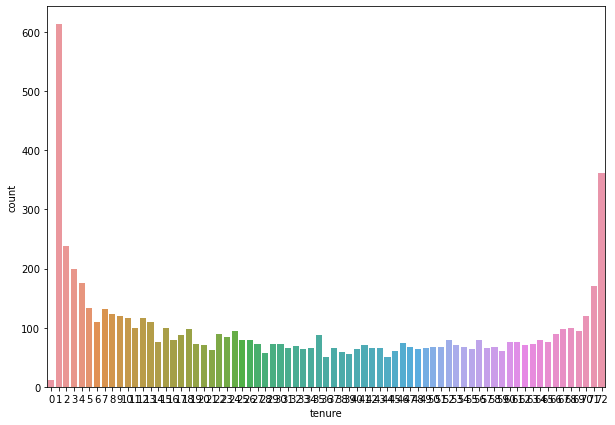

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(customer['tenure'])

In [24]:
customer['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [25]:
customer['PhoneService'].nunique()

2

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

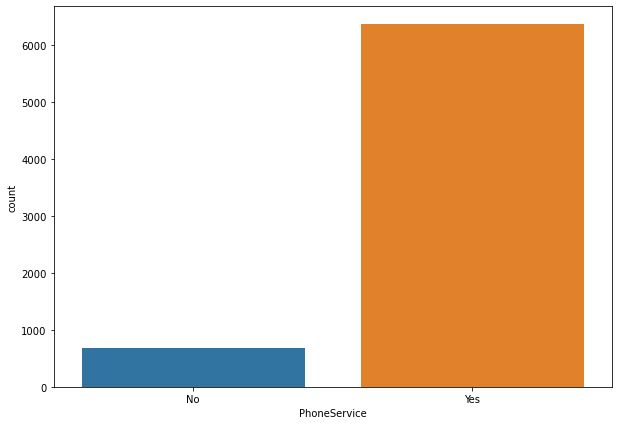

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(customer['PhoneService'])

In [27]:
customer['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [28]:
customer['MultipleLines'].nunique()

3

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

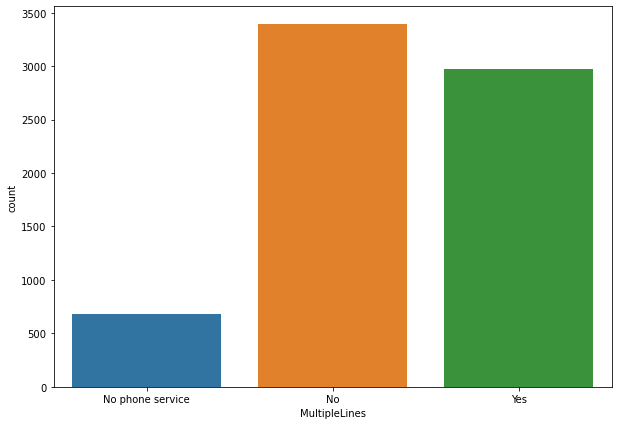

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(customer['MultipleLines'])

In [30]:
customer['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [31]:
customer['InternetService'].nunique()

3

<AxesSubplot:xlabel='InternetService', ylabel='count'>

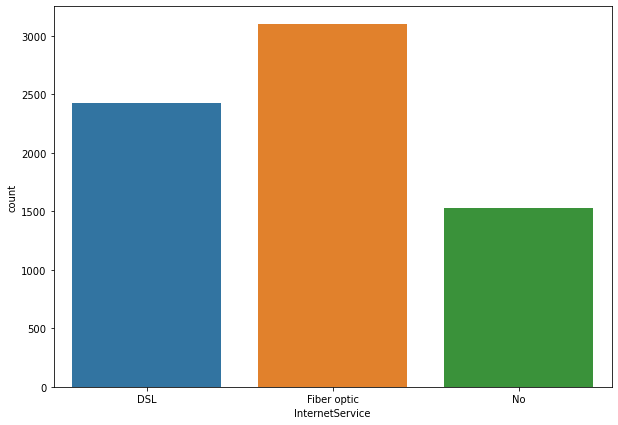

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(customer['InternetService'])

In [33]:
customer['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [34]:
customer['OnlineSecurity'].nunique()

3

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

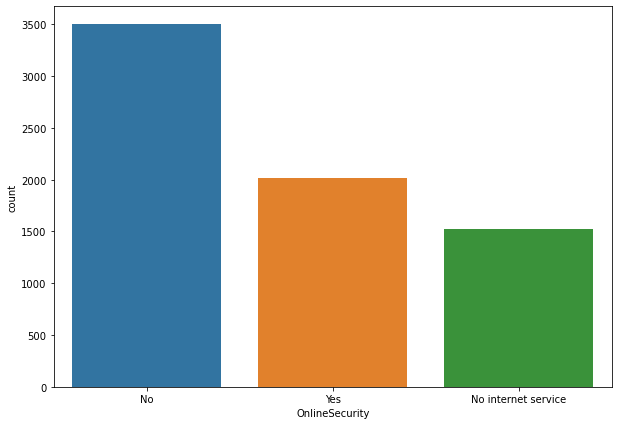

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(customer['OnlineSecurity'])

In [36]:
customer['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [37]:
customer['OnlineBackup'].nunique()

3

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

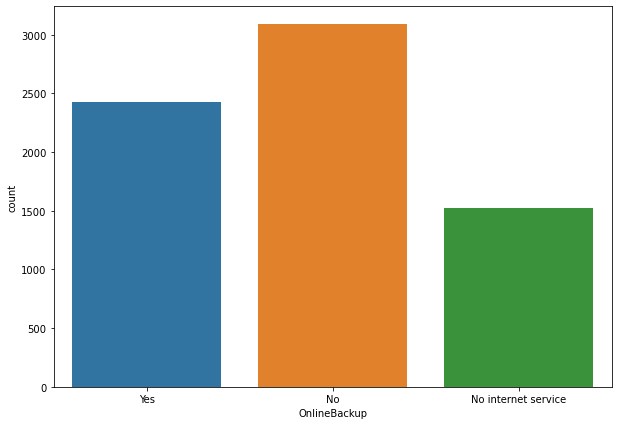

In [38]:
plt.figure(figsize=(10,7))
sns.countplot(customer['OnlineBackup'])

In [39]:
customer['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [40]:
customer['DeviceProtection'].nunique()

3

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

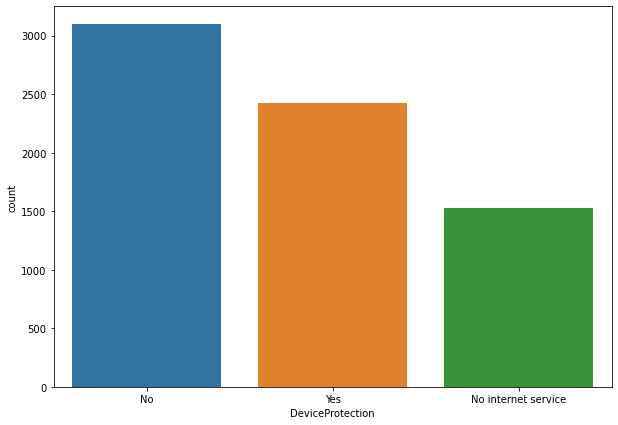

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(customer['DeviceProtection'])

In [42]:
customer['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [43]:
customer['TechSupport'].nunique()

3

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

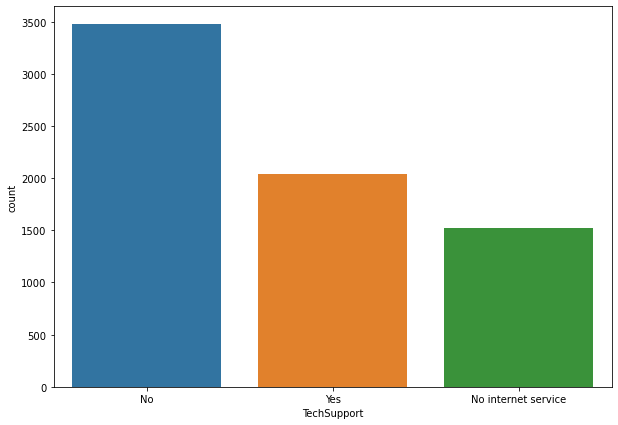

In [44]:
plt.figure(figsize=(10,7))
sns.countplot(customer['TechSupport'])

In [45]:
customer['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [46]:
customer['StreamingTV'].nunique()

3

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

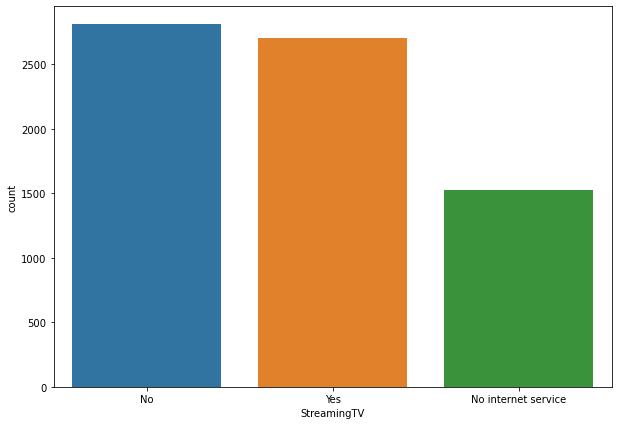

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(customer['StreamingTV'])

In [48]:
customer['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [49]:
customer['StreamingMovies'].nunique()

3

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

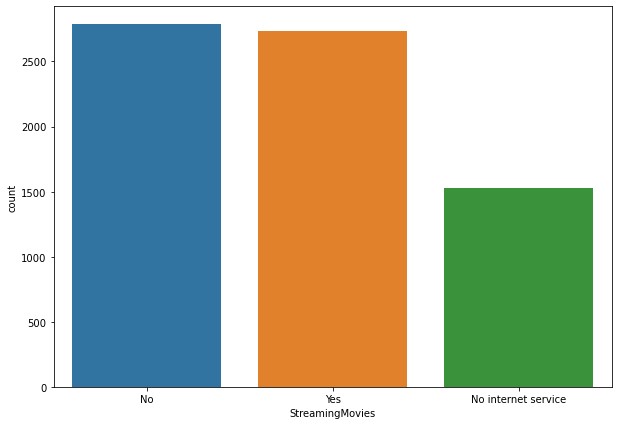

In [50]:
plt.figure(figsize=(10,7))
sns.countplot(customer['StreamingMovies'])

In [51]:
customer['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [52]:
customer['Contract'].nunique()

3

<AxesSubplot:xlabel='Contract', ylabel='count'>

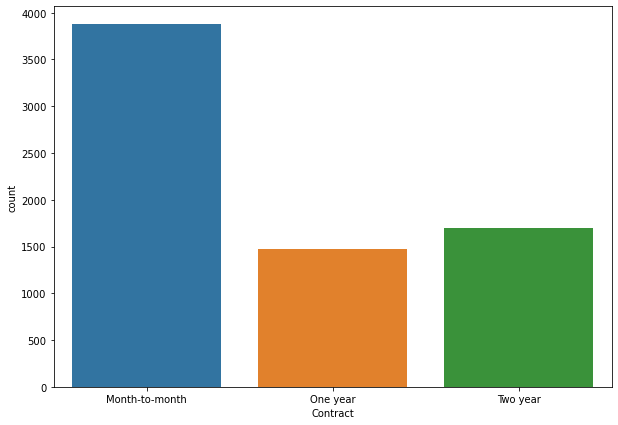

In [53]:
plt.figure(figsize=(10,7))
sns.countplot(customer['Contract'])

In [54]:
customer['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [55]:
customer['PaperlessBilling'].nunique()

2

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

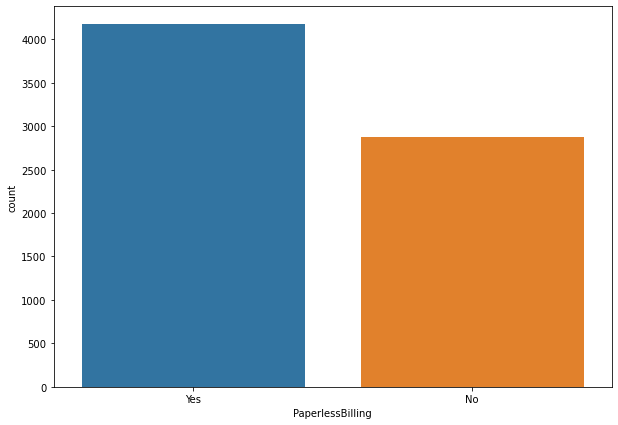

In [56]:
plt.figure(figsize=(10,7))
sns.countplot(customer['PaperlessBilling'])

In [57]:
customer['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [58]:
customer['PaymentMethod'].nunique()

4

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

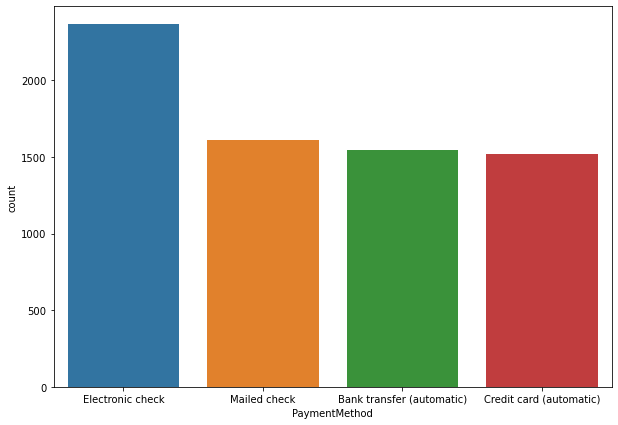

In [59]:
plt.figure(figsize=(10,7))
sns.countplot(customer['PaymentMethod'])

In [60]:
customer['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
19.70     43
19.65     43
19.55     40
20.15     40
19.75     39
20.25     39
20.35     38
19.80     38
19.60     37
20.10     37
20.20     35
19.50     32
19.40     31
20.45     31
20.40     30
19.45     28
20.50     28
20.30     28
20.55     27
19.35     25
19.30     24
20.65     23
25.25     20
25.10     19
19.25     18
25.00     17
19.20     17
20.75     17
84.80     17
74.40     16
81.00     15
20.85     15
24.45     15
24.80     15
20.60     15
79.85     14
70.15     14
80.45     14
79.20     14
25.05     14
25.15     14
89.85     13
20.70     13
80.85     13
95.00     13
69.95     13
89.55     13
75.35     13
80.55     12
55.00     12
19.10     12
25.40     12
74.90     12
84.30     12
70.30     12
24.95     12
85.30     12
94.40     12
24.70     12
85.45     12
75.50     12
80.00     11
75.30     11
74.95     11
24.90     11
95.10     11
90.05     11
69.50     11
55.30     11
19.15     11
74.35     11
99.00     11

In [61]:
customer['MonthlyCharges'].nunique()

1585

In [62]:
customer['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.65       8
20.05       8
19.9        8
19.55       7
45.3        7
20.15       6
20.25       6
19.45       6
20.45       5
20.3        5
44          4
50.15       4
75.3        4
49.9        4
69.9        4
19.85       4
19.4        4
44.4        4
69.6        4
70.6        4
20.35       4
20.5        4
74.7        4
19.95       4
69.95       4
69.65       4
20.4        4
19.2        4
19.3        4
19.5        4
45.1        3
50.6        3
24.8        3
85.5        3
69.25       3
69.1        3
74.9        3
75.35       3
44.75       3
74.3        3
220.45      3
45.85       3
84.5        3
74.6        3
20.9        3
24.4        3
19.25       3
20.1        3
45.7        3
305.55      3
383.65      3
55.7        3
70.45       3
86.05       3
69.55       3
1284.2      3
2317.1      3
50.45       3
19.1        3
70.15       3
70.3        3
25.25       3
79.55       3
74.35       3
20          3
470.2       3
50.75       3
35.9        3
80.55 

In feature "TotalCharges" we can see that 11 values are space, due to this space ,the datatype of feature "TotalCharges" is object.

here we can see that 11 values for feature " TotalCharges" is empty. now we get exact location of empty space using below command

In [63]:
customer['TotalCharges'].nunique()

6531

By using below command we can find the index location of empty space values.

In [64]:
customer.loc[customer['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


we get information about which rows contains empty space of feature 'TotalCharges', now convert the space into null values

In [65]:
customer['TotalCharges']=customer['TotalCharges'].replace(' ',np.nan)

In [66]:
customer.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

here we replaceed empty space by Nan values, we get 11 null values now we use mean method to replace null values

In [67]:
customer['TotalCharges']=customer['TotalCharges'].astype(float)

converting the column data type from object to float

In [68]:
customer['TotalCharges']=customer['TotalCharges'].replace(np.nan,customer['TotalCharges'].mean())

Here the 11 NaN value of "TotalCharges" are replaced by mean of "TotalCharges" beacaue data in feature are continous type

In [69]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [70]:
customer.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values are in dataset now

In [71]:
customer['TotalCharges']

0         29.850000
1       1889.500000
2        108.150000
3       1840.750000
4        151.650000
5        820.500000
6       1949.400000
7        301.900000
8       3046.050000
9       3487.950000
10       587.450000
11       326.800000
12      5681.100000
13      5036.300000
14      2686.050000
15      7895.150000
16      1022.950000
17      7382.250000
18       528.350000
19      1862.900000
20        39.650000
21       202.250000
22        20.150000
23      3505.100000
24      2970.300000
25      1530.600000
26      4749.150000
27        30.200000
28      6369.450000
29      1093.100000
30      6766.950000
31       181.650000
32      1874.450000
33        20.200000
34        45.250000
35      7251.700000
36       316.900000
37      3548.300000
38      3549.250000
39      1105.400000
40       475.700000
41      4872.350000
42       418.250000
43      4861.450000
44       981.450000
45      3906.700000
46        97.000000
47       144.150000
48      4217.800000
49      4254.100000


In [72]:
customer['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [73]:
customer['Churn'].nunique()

2

<AxesSubplot:xlabel='Churn', ylabel='count'>

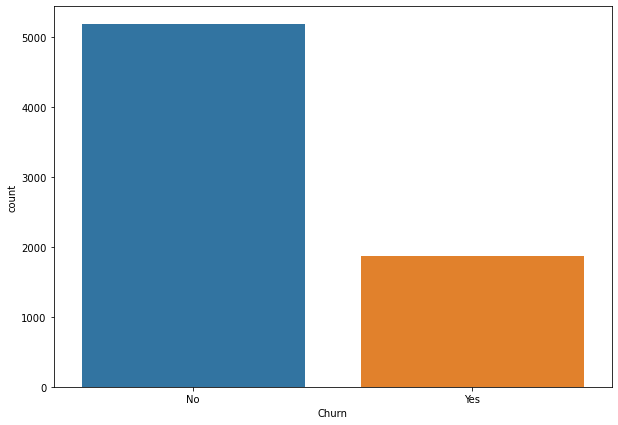

In [74]:
plt.figure(figsize=(10,7))
sns.countplot(customer['Churn'])

In [75]:
1869/5174

0.36122922303826827

here we checked the ratio of class 'No' and "Yes" we found that class ratio is imbalanced

In [76]:
customer.shape

(7043, 20)

### here column "Churn" is Label which is categorical type, So our problem is Classification Type

In [77]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [78]:
customer_num=customer.drop(columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],axis=1)
customer_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


Here we create new dataframe"customer_num" from dataframe "customer" which contains only continous data. we do this for next operation

In [79]:
customer_num.shape

(7043, 3)

This data has 7043 rows with 3 columns, and 7043 rows

In [80]:
customer_cat=customer.drop(columns=['tenure','MonthlyCharges','TotalCharges'],axis=1)
customer_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


now we created separate dataframe "customer_cat" which contains only categorical data and feature,

In [81]:
customer_cat.shape

(7043, 17)

here we can see that total 17 columns are assigned for categorical data

# Univariate Analysis

Now we will perform this analysis for Continous data, we implement distplot to see distribution of feature.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

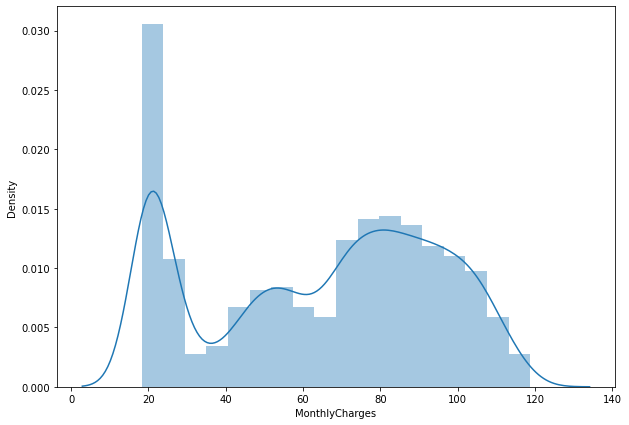

In [82]:
plt.figure(figsize=(10,7))
sns.distplot(customer_num['MonthlyCharges'])

the feature "MonthlyCharges" has nearly normally distrubuted data.no large skewness is present

<AxesSubplot:xlabel='tenure', ylabel='Density'>

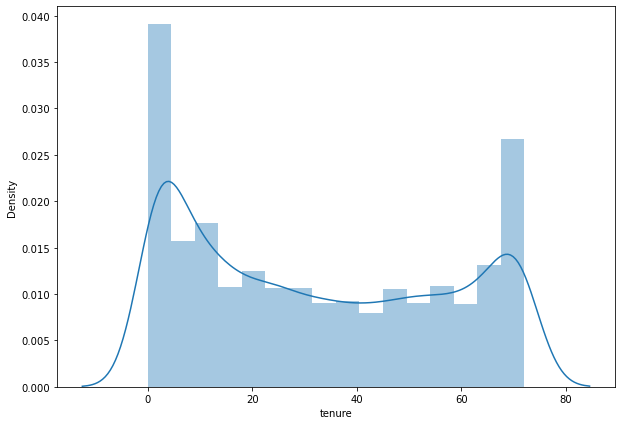

In [83]:
plt.figure(figsize=(10,7))
sns.distplot(customer_num['tenure'])

the feature "tenure" has normally distributed data.no high skewness is present in data 

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

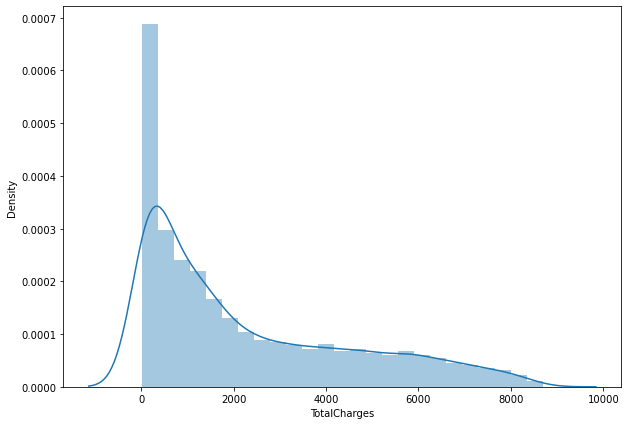

In [84]:
plt.figure(figsize=(10,7))
sns.distplot(customer_num['TotalCharges'])

The feature "TotalCharges" has right skewness present,so we need to apply skewness removal techniques

# Outlier Detection

<AxesSubplot:xlabel='MonthlyCharges'>

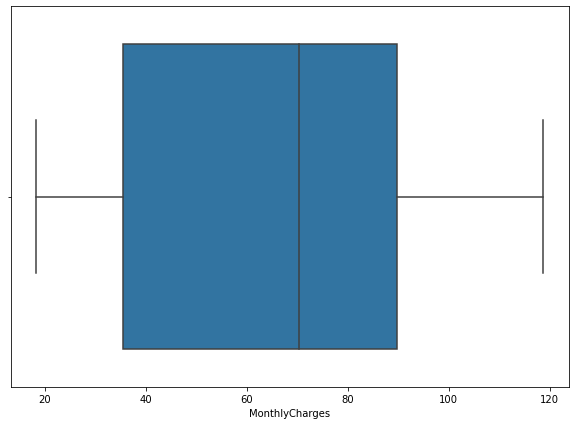

In [85]:
plt.figure(figsize=(10,7))
sns.boxplot(customer_num['MonthlyCharges'])


We use boxplot to remove the outliers,the feature "MonthlyCharges" conatains no outliers above third quartile or below first quartile.

<AxesSubplot:xlabel='tenure'>

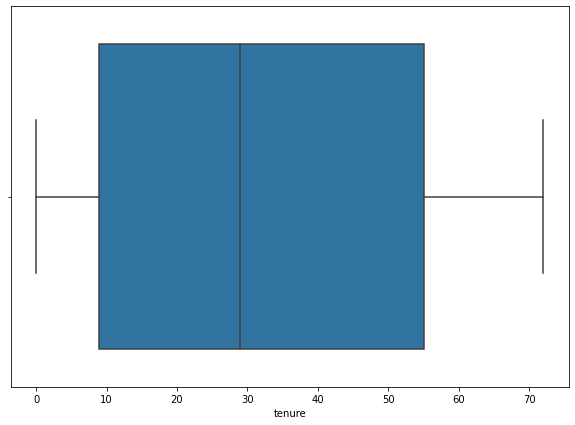

In [86]:
plt.figure(figsize=(10,7))
sns.boxplot(customer_num['tenure'])


feature "tenure" has no outlier.

<AxesSubplot:xlabel='TotalCharges'>

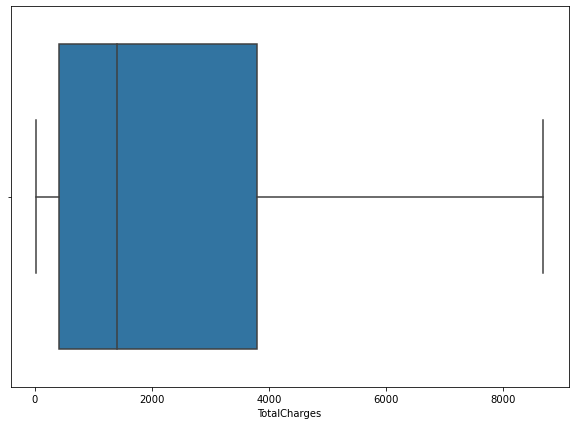

In [87]:
plt.figure(figsize=(10,7))
sns.boxplot(customer_num['TotalCharges'])

the feature "TotalCharges" has no outliers.this is good for our data analysis

### All three feature has no outlier , so no need of outlier removal methods like zscore and IQR

In [88]:
customer_num.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

skweness range is from -0.5 to 0.5,the feature  "TotalCharges" has skewness 0.96 which is above 0.5.which need skewness removal other two values is in range

# Skewness Removal

In [89]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
customer_num['tenure']=scaler.fit_transform(customer_num['tenure'].values.reshape(-1,1))
customer_num['MonthlyCharges']=scaler.fit_transform(customer_num['MonthlyCharges'].values.reshape(-1,1))
customer_num['TotalCharges']=scaler.fit_transform(customer_num['TotalCharges'].values.reshape(-1,1))

Here we applied power transformer as a skewness removal technique on all three features

Lets again visualize the distplot of continous features

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

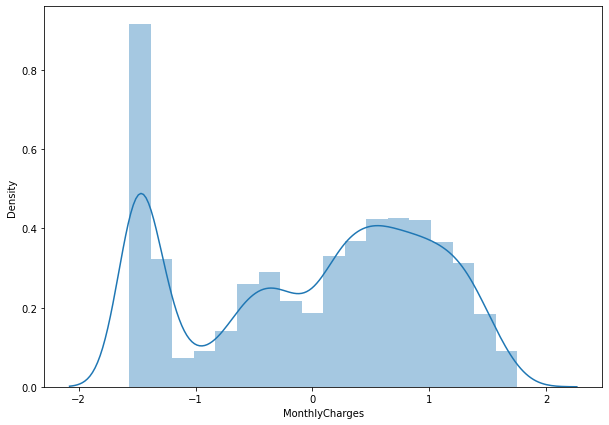

In [91]:
plt.figure(figsize=(10,7))
sns.distplot(customer_num['MonthlyCharges'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

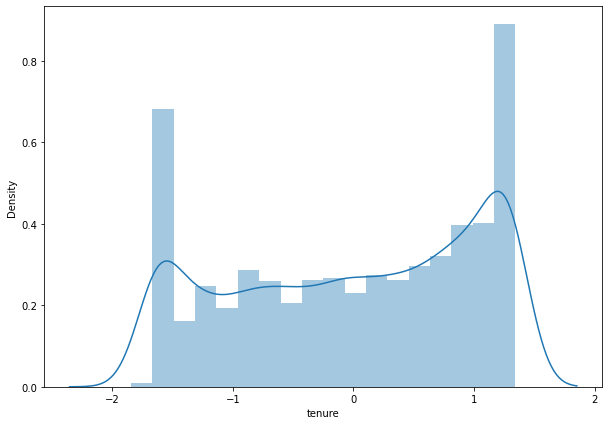

In [92]:
plt.figure(figsize=(10,7))
sns.distplot(customer_num['tenure'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

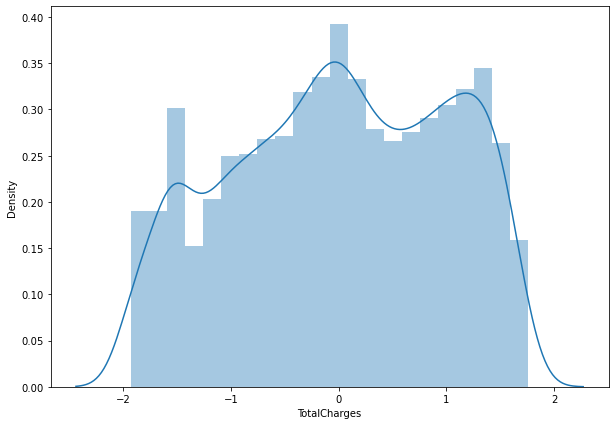

In [93]:
plt.figure(figsize=(10,7))
sns.distplot(customer_num['TotalCharges'])

In [94]:
customer_num.skew()

tenure           -0.243325
MonthlyCharges   -0.259035
TotalCharges     -0.144899
dtype: float64

after applying power transformer , we observe that skewness of feature "TotalCharges" is reduced and is in the range 0.5 to -0.5. other two features remains same

In [95]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Encoding

In [96]:
customer_cat=pd.get_dummies(customer_cat,columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
customer_cat['gender']=le.fit_transform(customer_cat['gender'])
customer_cat['Partner']=le.fit_transform(customer_cat['Partner'])
customer_cat['Dependents']=le.fit_transform(customer_cat['Dependents'])
customer_cat['PhoneService']=le.fit_transform(customer_cat['PhoneService'])
customer_cat['PaperlessBilling']=le.fit_transform(customer_cat['PaperlessBilling'])
customer_cat['Churn']=le.fit_transform(customer_cat['Churn'])


in this section, we used two encoding,first one is one hot encoding and second is label encoding.One hot encoding is used on those feature which contains more than 2 classes, it gives n number of columns if column has n classes, for example. if a feature has 4 classes, then one hot encoding give 4 new column, one for each class.
Second encoding is label encoding, which is applied on features which has only two classes.the above feature on which we applied label encoding has two classes, which give 0 and 1 only

In [128]:
customer_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


here we can observe that , all features are converted into numerical data

In [129]:
customer_cat.shape

(7043, 38)

now columns in dataset is 38 now

In [130]:
customer_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   gender                                   7043 non-null   int32
 1   SeniorCitizen                            7043 non-null   int64
 2   Partner                                  7043 non-null   int32
 3   Dependents                               7043 non-null   int32
 4   PhoneService                             7043 non-null   int32
 5   PaperlessBilling                         7043 non-null   int32
 6   Churn                                    7043 non-null   int32
 7   MultipleLines_No                         7043 non-null   uint8
 8   MultipleLines_No phone service           7043 non-null   uint8
 9   MultipleLines_Yes                        7043 non-null   uint8
 10  InternetService_DSL                      7043 non-null   uint8
 11  Inte

The info() method shows that,datatype"uint8" for those column where we use one hot encoding, and int data type for those feature where we use label encoding.

In [131]:
customer_cat.isnull().sum()


gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PhoneService                               0
PaperlessBilling                           0
Churn                                      0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSuppor

# Bivariate Analysis

In Bivariate Analysis, we implemet Catplot, with kind "bar" and we select hue="gender",hue classify the catplot as per gender

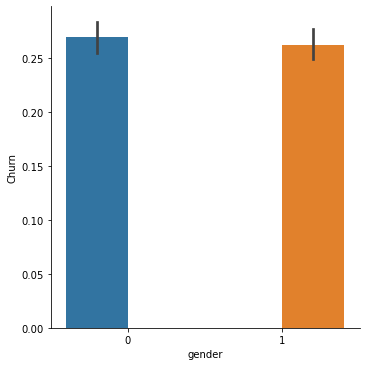

In [104]:

sns.catplot(x="gender", y="Churn", hue="gender", kind="bar", data=customer_cat)

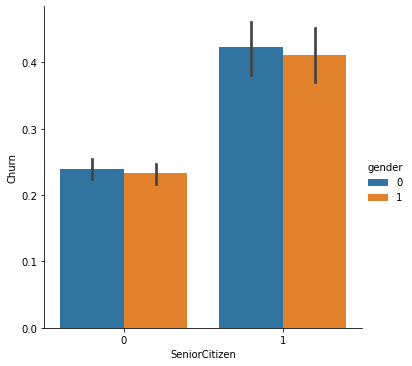

In [105]:
sns.catplot(x="SeniorCitizen", y="Churn", hue="gender", kind="bar", data=customer_cat)

the catplot shows that "SeniorCitizen" with class 1 has more churn than class0.

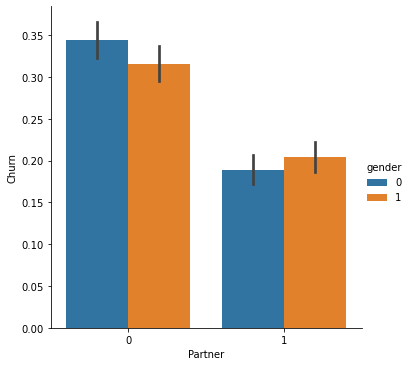

In [106]:
sns.catplot(x="Partner", y="Churn", hue="gender", kind="bar", data=customer_cat)

The catplot show that partner having class 0 has more churn than class 1

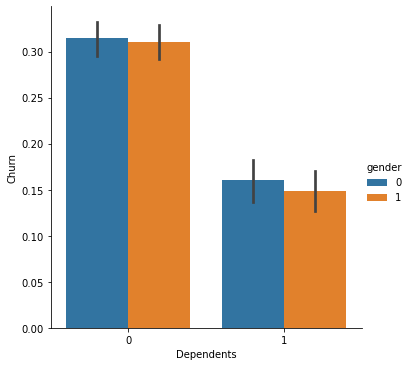

In [107]:
sns.catplot(x="Dependents", y="Churn", hue="gender", kind="bar", data=customer_cat)

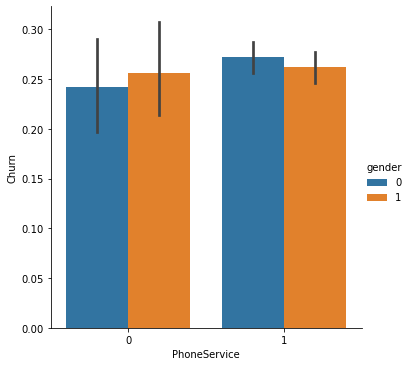

In [108]:
sns.catplot(x="PhoneService", y="Churn", hue="gender", kind="bar", data=customer_cat)

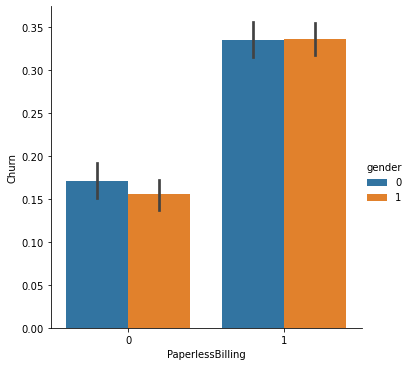

In [109]:
sns.catplot(x="PaperlessBilling", y="Churn", hue="gender", kind="bar", data=customer_cat)

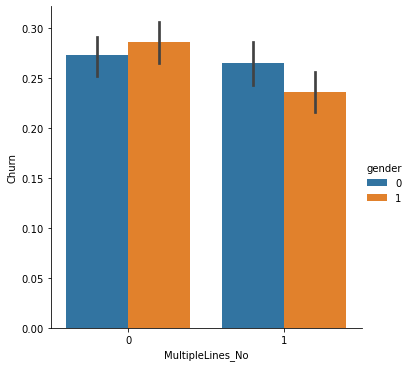

In [110]:
sns.catplot(x="MultipleLines_No", y="Churn", hue="gender", kind="bar", data=customer_cat)

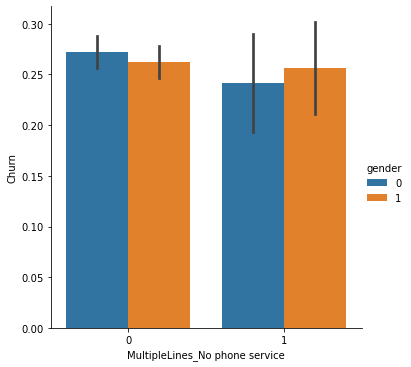

In [111]:
sns.catplot(x="MultipleLines_No phone service", y="Churn", hue="gender", kind="bar", data=customer_cat)

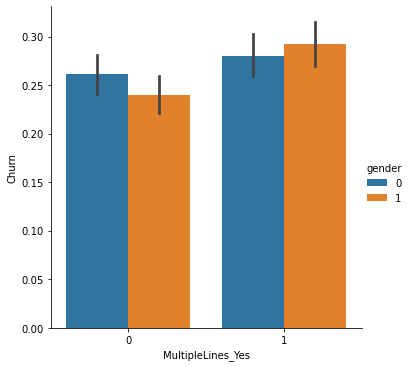

In [112]:
sns.catplot(x="MultipleLines_Yes", y="Churn", hue="gender", kind="bar", data=customer_cat)

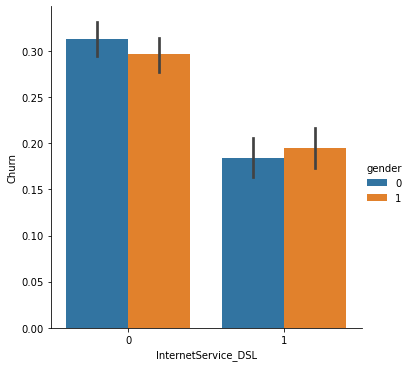

In [113]:
sns.catplot(x="InternetService_DSL", y="Churn", hue="gender", kind="bar", data=customer_cat)

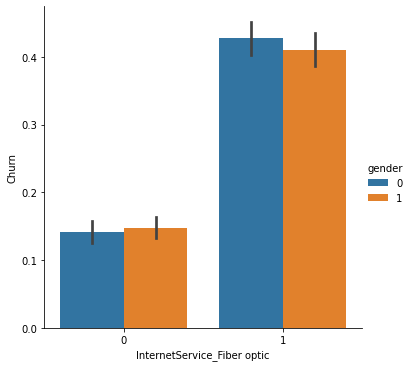

In [114]:
sns.catplot(x="InternetService_Fiber optic", y="Churn", hue="gender", kind="bar", data=customer_cat)

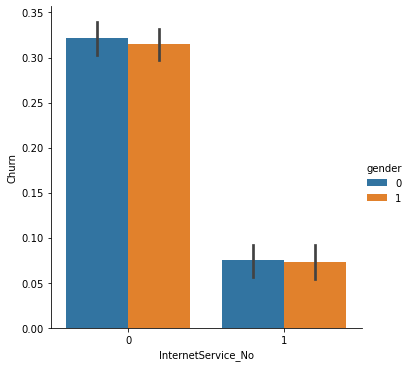

In [115]:
sns.catplot(x="InternetService_No", y="Churn", hue="gender", kind="bar", data=customer_cat)

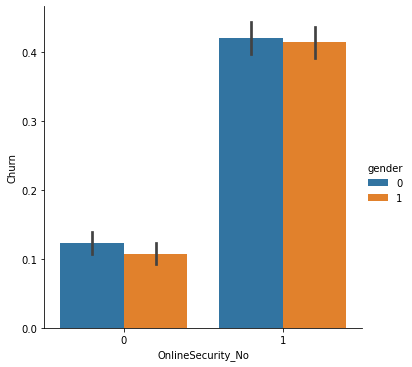

In [116]:
sns.catplot(x="OnlineSecurity_No", y="Churn", hue="gender", kind="bar", data=customer_cat)

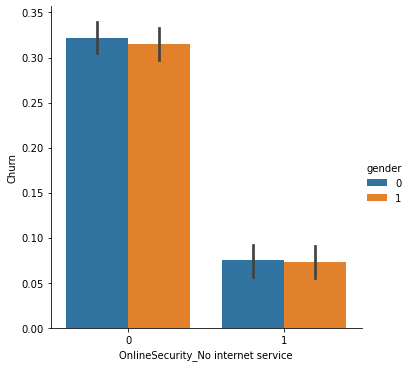

In [117]:
sns.catplot(x="OnlineSecurity_No internet service", y="Churn", hue="gender", kind="bar", data=customer_cat)

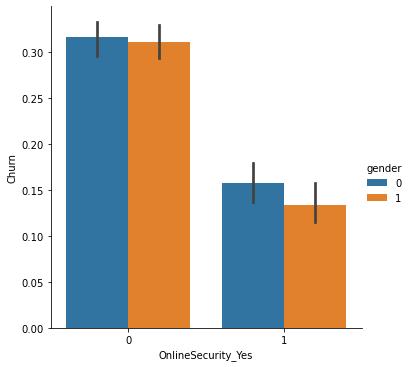

In [118]:
sns.catplot(x="OnlineSecurity_Yes", y="Churn", hue="gender", kind="bar", data=customer_cat)

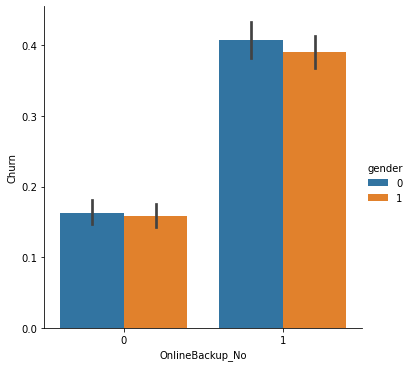

In [119]:
sns.catplot(x="OnlineBackup_No", y="Churn", hue="gender", kind="bar", data=customer_cat)

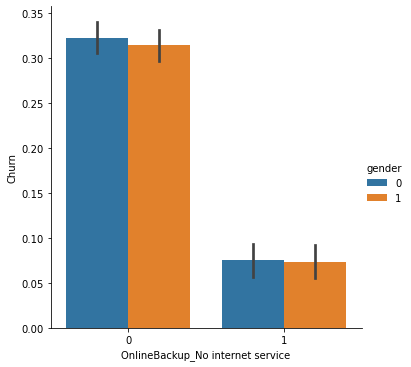

In [120]:
sns.catplot(x="OnlineBackup_No internet service", y="Churn", hue="gender", kind="bar", data=customer_cat)

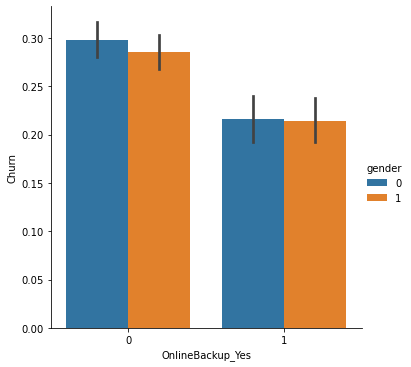

In [121]:
sns.catplot(x="OnlineBackup_Yes", y="Churn", hue="gender", kind="bar", data=customer_cat)

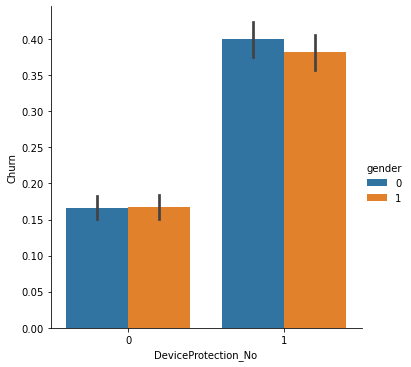

In [122]:
sns.catplot(x="DeviceProtection_No", y="Churn", hue="gender", kind="bar", data=customer_cat)

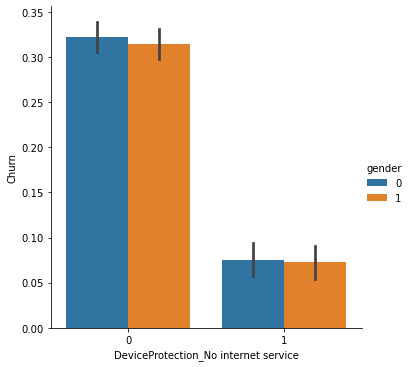

In [123]:
sns.catplot(x="DeviceProtection_No internet service", y="Churn", hue="gender", kind="bar", data=customer_cat)

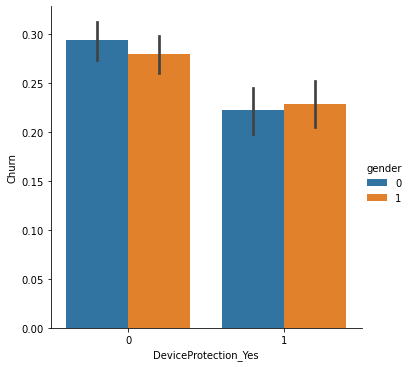

In [124]:
sns.catplot(x="DeviceProtection_Yes", y="Churn", hue="gender", kind="bar", data=customer_cat)

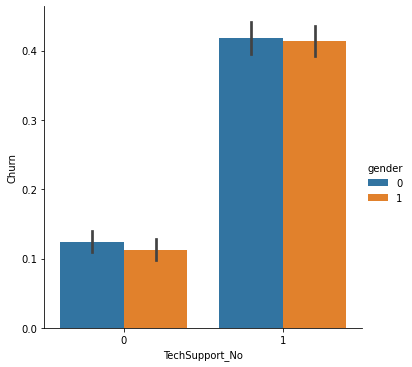

In [125]:
sns.catplot(x="TechSupport_No", y="Churn", hue="gender", kind="bar", data=customer_cat)

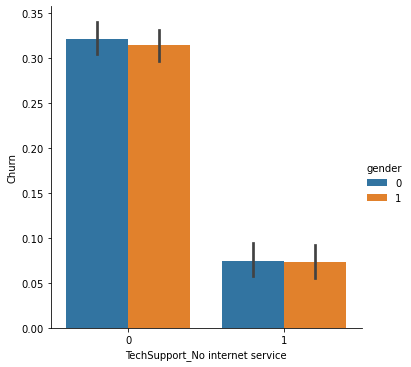

In [132]:
sns.catplot(x="TechSupport_No internet service", y="Churn", hue="gender", kind="bar", data=customer_cat)

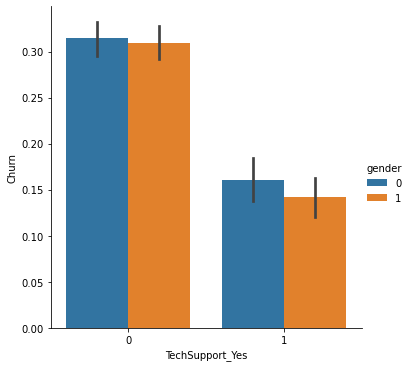

In [133]:
sns.catplot(x="TechSupport_Yes", y="Churn", hue="gender", kind="bar", data=customer_cat)

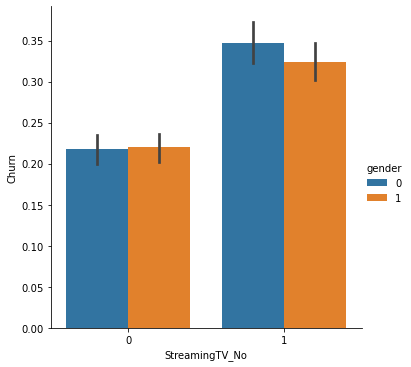

In [134]:
sns.catplot(x="StreamingTV_No", y="Churn", hue="gender", kind="bar", data=customer_cat)

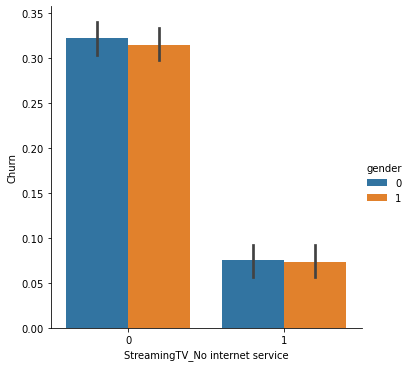

In [135]:
sns.catplot(x="StreamingTV_No internet service", y="Churn", hue="gender", kind="bar", data=customer_cat)

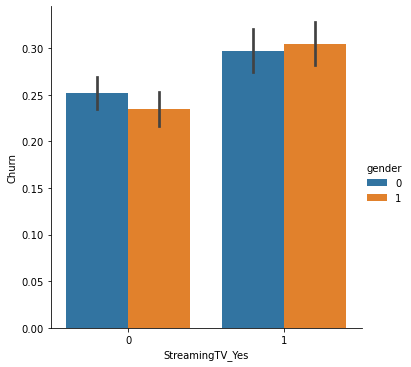

In [136]:
sns.catplot(x="StreamingTV_Yes", y="Churn", hue="gender", kind="bar", data=customer_cat)

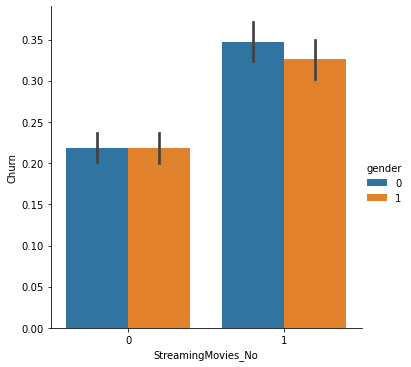

In [137]:
sns.catplot(x="StreamingMovies_No", y="Churn", hue="gender", kind="bar", data=customer_cat)

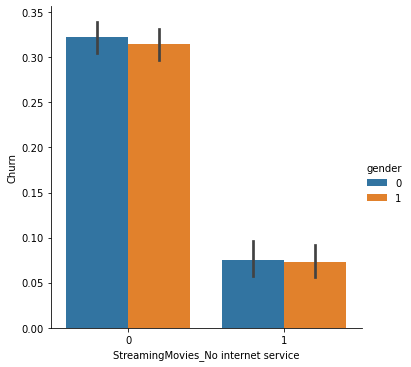

In [138]:
sns.catplot(x="StreamingMovies_No internet service", y="Churn", hue="gender", kind="bar", data=customer_cat)

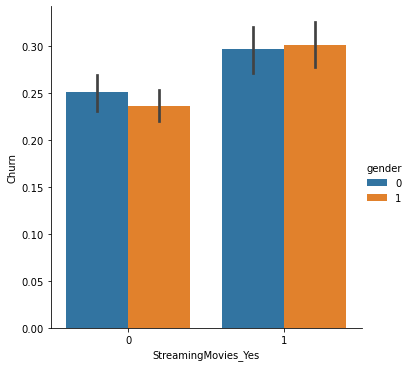

In [139]:
sns.catplot(x="StreamingMovies_Yes", y="Churn", hue="gender", kind="bar", data=customer_cat)

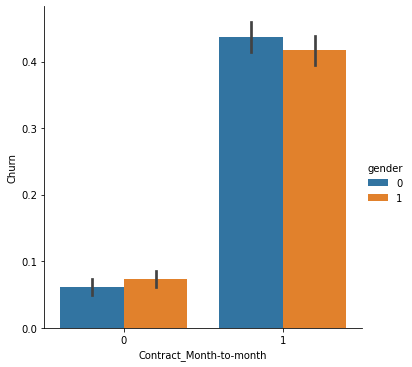

In [140]:
sns.catplot(x="Contract_Month-to-month", y="Churn", hue="gender", kind="bar", data=customer_cat)

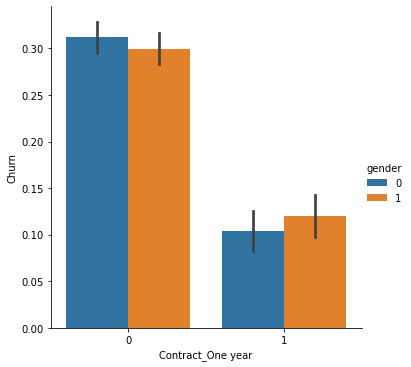

In [141]:
sns.catplot(x="Contract_One year", y="Churn", hue="gender", kind="bar", data=customer_cat)

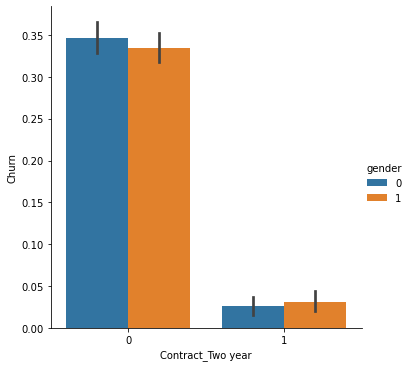

In [142]:
sns.catplot(x="Contract_Two year", y="Churn", hue="gender", kind="bar", data=customer_cat)

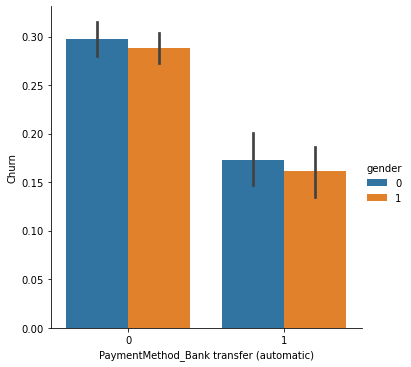

In [143]:
sns.catplot(x="PaymentMethod_Bank transfer (automatic)", y="Churn", hue="gender", kind="bar", data=customer_cat)

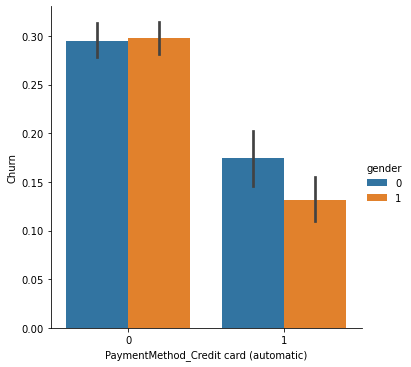

In [144]:
sns.catplot(x="PaymentMethod_Credit card (automatic)", y="Churn", hue="gender", kind="bar", data=customer_cat)

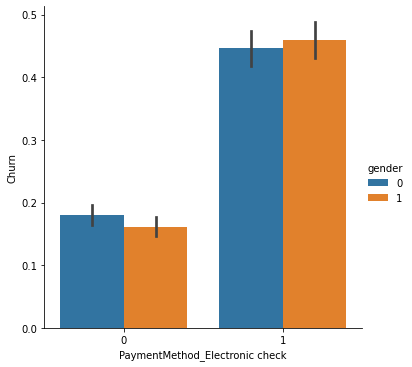

In [145]:
sns.catplot(x="PaymentMethod_Electronic check", y="Churn", hue="gender", kind="bar", data=customer_cat)

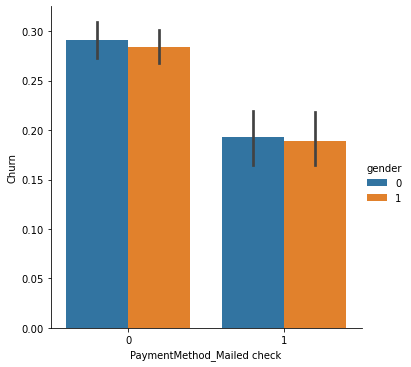

In [146]:
 sns.catplot(x="PaymentMethod_Mailed check", y="Churn", hue="gender", kind="bar", data=customer_cat)

# Scaling

In [147]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(customer_num)

Standard scaler removes the mean and scales each features to unit variance ,we got all transformed values,generally it is useful for those feature which has normal distribution, here we pass customer_num to standard scaler

In [148]:
customer_num1=pd.DataFrame(x_scaled,columns = customer_num.columns)# here converted array into dataframe
customer_num1.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.644343,-1.158541,-1.810588
1,0.297205,-0.239492,0.253313
2,-1.495444,-0.342665,-1.387269
3,0.646327,-0.731079,0.232253
4,-1.495444,0.213545,-1.250118


here we again convert x scaled array into dataframe

In [149]:
customer_num1.shape

(7043, 3)

In [150]:
customer_cat.shape

(7043, 38)

In [151]:
customer_num1.isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [152]:
customer_cat.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PhoneService                               0
PaperlessBilling                           0
Churn                                      0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSuppor

In [153]:
customer_new= pd.concat([customer_num1,customer_cat],axis=1)  # here concate both dataframe after scaling

Now we concatenate the categorical dataframe "customer_cat" and  continous dataframe "customer_num1"

In [154]:
customer_new.shape

(7043, 41)

we got now 41 columns now

In [155]:
customer_new.isnull().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PhoneService                               0
PaperlessBilling                           0
Churn                                      0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProt

we found no null values.

# Oversampling using SMOTE

as we discussed earlier, our label "Churn" has class imbalance, so we will use SMOTE method to oversample our data 

In [156]:
x_1=customer_new.drop(columns=['Churn'],axis=1)
y_1=customer_new['Churn']

here we separated label from feature

In [157]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_1,y_1=SM.fit_resample(x_1,y_1)

In [158]:
y_1.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

now we got same count for both classes 5174. now again concatenate the dataframe

In [159]:
customer_new=pd.concat([x_1,y_1],axis=1)

In [160]:
customer_new.shape

(10348, 41)

Due to oversampling the rows are increased from 7043 to 10348

In [161]:
x=customer_new.drop(columns=['Churn'],axis=1)
y=customer_new['Churn']

 now we separate label from features, y denote label "Churn" and x denotes all features

x has only feature and y contains only labels

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

classification score is used to check performance of classification model,classification score give accuracy which is ratio of true predictions divided by total predictions.classification report contains precision,f1 score and accuracy. Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance

In [163]:
#finding best random state
from sklearn.tree import DecisionTreeClassifier
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=accuracy_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.8040201005025126 on Random state 74


Whatever number we get as a random state is used by train test split in below code

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=MaxRs)

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [166]:
Log_reg=LogisticRegression()
Log_reg.fit(x_train,y_train)
Log_reg_pred=Log_reg.predict(x_test)
Log_reg_accuracy=accuracy_score(y_test,Log_reg_pred)
print('Log_reg_accuracy',Log_reg_accuracy*100)

Log_reg_accuracy 84.0742172400464


Logistics Regression is a algorithm used to predict data value by analysing one or more the independant features or variables

In [167]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)# fit training data to classifier
DTC_pred=DTC.predict(x_test)# predict output according test data
DTC_accuracy=accuracy_score(y_test,DTC_pred) #here we compared y_test with predicted output
print('DTC_accuracy',DTC_accuracy*100)

DTC_accuracy 80.13142636258213


Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [168]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)# fit training data to classifier
KNC_pred=KNC.predict(x_test)# predict output according test data
KNC_accuracy=accuracy_score(y_test,KNC_pred) #here we compared y_test with predicted output
print('KNC_accuracy',KNC_accuracy*100)

KNC_accuracy 82.75995361422497


KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [169]:
svc=SVC()
svc.fit(x_train,y_train)# fit training data to classifier
svc_pred=svc.predict(x_test) #predict output according test data
svc_accuracy=accuracy_score(y_test,svc_pred) #here we compared y_test with predicted output
print('svc_accuracy',svc_accuracy*100)

svc_accuracy 83.91959798994975


SVC is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [170]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)# fit training data to classifier
RFC_pred=RFC.predict(x_test) #predict label according test feature
RFC_accuracy=accuracy_score(y_test,RFC_pred)#here we compared test label with predicted label
print('RFC_accuracy',RFC_accuracy*100)

RFC_accuracy 85.7750289911094


RFC is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [171]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)# fit training data to classifier
GBC_pred=GBC.predict(x_test) #predict label according test feature
GBC_accuracy=accuracy_score(y_test,GBC_pred)#here we compared test label with predicted label
print('GBC_accuracy',GBC_accuracy*100)

GBC_accuracy 83.22381136451487


Gradient boosting is ensemble algorithm it involves building a strong model by using collection of weaker models.It combine many weak models and make strong predictive model

In [172]:
XBC=XGBClassifier(eval_metric='mlogloss')
XBC.fit(x_train,y_train)# fit training data to classifier
XBC_pred=XBC.predict(x_test) #predict label according test feature
XBC_accuracy=accuracy_score(y_test,XBC_pred)#here we compared test label with predicted label
print('XBC_accuracy',XBC_accuracy*100)

XBC_accuracy 85.15655199072285


In [173]:
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [174]:
Log_reg_cv_score=cross_val_score(Log_reg,x,y,cv=5).mean() # we pass Logistic regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Log_reg_cv_score*100

82.36465608020865

In [175]:
DTC_CV_score=cross_val_score(DTC,x,y,cv=5).mean() # we pass Decision Tree classifier model,feature,target and cv=5 means 4 set for training and 1 for testing
DTC_CV_score*100

78.32505142627656

In [176]:
KNC_CV_score=cross_val_score(KNC,x,y,cv=5).mean() # we pass model K neighbors Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
KNC_CV_score*100

82.44138571925573

In [177]:
svc_CV_score=cross_val_score(svc,x,y,cv=5).mean() # we pass model Support Vector Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
svc_CV_score*100

82.77043917222959

In [178]:
RFC_CV_score=cross_val_score(RFC,x,y,cv=5).mean() # we pass model Random Forest Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
RFC_CV_score*100

85.42775221057106

In [179]:
GBC_CV_score=cross_val_score(GBC,x,y,cv=5).mean() # we pass model Gradient boosting Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
GBC_CV_score*100

81.00164143802114

In [180]:
XBC_CV_score=cross_val_score(XBC,x,y,cv=5).mean() # we pass model Extreme Gradient boosting,feature,target and cv=5 means 4 set for training and 1 for testing
XBC_CV_score*100

83.52445462462903

In [181]:
Logistic_regression_diff=Log_reg_accuracy*100-Log_reg_cv_score*100
print('Logistic_regression_diff',Logistic_regression_diff)
DTC_diff=DTC_accuracy*100-DTC_CV_score*100
print('DTC_diff',DTC_diff)
KNC_diff=KNC_accuracy*100-KNC_CV_score*100
print("KNC_diff",KNC_diff)
svc_diff=svc_accuracy*100-svc_CV_score*100
print("svc_diff",svc_diff)
RFC_diff=RFC_accuracy*100-RFC_CV_score*100
print("RFC_diff",RFC_diff)
GBC_diff=GBC_accuracy*100-GBC_CV_score*100
print("GBC_diff",GBC_diff)
XBC_diff=XBC_accuracy*100-XBC_CV_score*100
print("XBC_diff",XBC_diff)

Logistic_regression_diff 1.7095611598377474
DTC_diff 1.8063749363055734
KNC_diff 0.31856789496923454
svc_diff 1.1491588177201635
RFC_diff 0.347276780538337
GBC_diff 2.2221699264937342
XBC_diff 1.6320973660938165


In [182]:
print("Log_reg_accuracy",Log_reg_accuracy)
print("Log_reg_cv_score", Log_reg_cv_score)
print("Logistic_regression_diff", Logistic_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("DTC_accuracy",DTC_accuracy)
print("DTC_CV_score",DTC_CV_score)
print("DTC_diff",DTC_diff)
print("-------------------------------------------------------------------------------------------")
print("KNC_accuracy",KNC_accuracy)
print("KNC_CV_score", KNC_CV_score)
print("KNC_diff",KNC_diff)

print("-------------------------------------------------------------------------------------------")
print("svc_accuracy",svc_accuracy)
print("svc_CV_score",svc_CV_score)
print("svc_diff", svc_diff)
print("-------------------------------------------------------------------------------------------")

print("RFC_accuracy",RFC_accuracy)
print("RFC_CV_score",RFC_CV_score)
print("RFC_diff",RFC_diff)

print("-------------------------------------------------------------------------------------------")

print("GBC_accuracy",GBC_accuracy)
print("GBC_CV_score",GBC_CV_score) 
print("GBC_diff",GBC_diff)

print("-------------------------------------------------------------------------------------------")

print("XBC_accuracy",XBC_accuracy)
print("XBC_CV_score",XBC_CV_score) 
print("XBC_diff",XBC_diff)

Log_reg_accuracy 0.8407421724004639
Log_reg_cv_score 0.8236465608020864
Logistic_regression_diff 1.7095611598377474
-------------------------------------------------------------------------------------------
DTC_accuracy 0.8013142636258214
DTC_CV_score 0.7832505142627656
DTC_diff 1.8063749363055734
-------------------------------------------------------------------------------------------
KNC_accuracy 0.8275995361422497
KNC_CV_score 0.8244138571925573
KNC_diff 0.31856789496923454
-------------------------------------------------------------------------------------------
svc_accuracy 0.8391959798994975
svc_CV_score 0.8277043917222958
svc_diff 1.1491588177201635
-------------------------------------------------------------------------------------------
RFC_accuracy 0.8577502899110939
RFC_CV_score 0.8542775221057106
RFC_diff 0.347276780538337
-------------------------------------------------------------------------------------------
GBC_accuracy 0.8322381136451488
GBC_CV_score 0.810016414

Here we get Accuracy ,CV score and Difference between them for all model,for Random forest Classifier,difference is some less as compared to other algorithm,but accuracy and CV score for RFC is more than other algorithm. so we will prefer hyperparameter tuning for Random forest Classifier.

In [183]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated accuracy which is not overfitted also

In [184]:
params={'n_estimators':[10,15],
       'criterion':['entropy'],
       'max_depth':[10,15],
       'min_samples_leaf':[5,6],
       'min_samples_split':[10,11]}

Here we created list of parameter for Random Forest Classifier

In [185]:
Grid_RFC=GridSearchCV(RFC,param_grid=params,cv=5)
Grid_RFC.fit(x_train,y_train)
Grid_RFC.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 15}

now we will pass this parameter to Random forest classifier to get best accuracy score

In [196]:
Final_RFC=RandomForestClassifier(criterion='entropy',max_depth=15,min_samples_leaf=5 ,min_samples_split=11,n_estimators=15)
Final_RFC.fit(x_train,y_train)
final_pred=Final_RFC.predict(x_test)
final_score=accuracy_score(y_test,final_pred)
print(final_score*100)

83.76497873985312


 We get final accuracy score after hyperparameter tuning is between 83  to 84

In [197]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,final_pred)
cfm

array([[1044,  248],
       [ 172, 1123]], dtype=int64)

Confusion matrix give us matrix of TN,TP,FP and FN

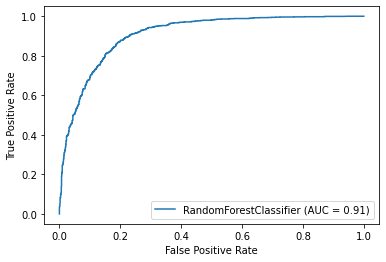

In [198]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(Final_RFC,x_test,y_test)

This curve helps us to choose the best model amongst the models for which we have plotted ROC curve.The best model is one which cover the maximum area under it.our Random Forest classifier ROC curve cover almost more than 90 % area under it.


In [199]:
import joblib
joblib.dump(Final_RFC,"Customer Churn Prediction.pkl")

['Customer Churn Prediction.pkl']

Here we saved our model sucessfully